In [1]:
# This code is written to support the experiments in the book titled:
# "Adaptive Machine Learning Algorithms"
# by
# Chanchal Chatterjee and Vwani P. Roychowdhury
# August 2021
#
# Experiments for Chapter 3 - Inverse Square Root of a Matrix
#
# Author: Chanchal Chatterjee
#

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [3]:
# Number of samples N and dimension D
nSamples = 1000
nDim     = 10
nEpochs  = 1

In [4]:
# Generate the covX random matrices
cov = 3*np.array([ \
    [ 0.0910,  0.0380, -0.0530, -0.0050,  0.0100, -0.1360,  0.1550,  0.0300,  0.0020,  0.0320 ], \
    [ 0.0380,  0.3730,  0.0180, -0.0280, -0.0110, -0.3670,  0.1540, -0.0570, -0.0310, -0.0650 ], \
    [-0.0530,  0.0180,  1.4300,  0.0170,  0.0550, -0.4500, -0.0380, -0.2980, -0.0410, -0.0300 ], \
    [-0.0050, -0.0280,  0.0170,  0.0840, -0.0050,  0.0160,  0.0420, -0.0220,  0.0010,  0.0050 ], \
    [ 0.0100, -0.0110,  0.0550, -0.0050,  0.0710,  0.0880,  0.0580, -0.0690, -0.0080,  0.0030 ], \
    [-0.1360, -0.3670, -0.4500,  0.0160,  0.0880,  5.7200, -0.5440, -0.2480,  0.0050,  0.0950 ], \
    [ 0.1550,  0.1540, -0.0380,  0.0420,  0.0580, -0.5440,  2.7500, -0.3430, -0.0110, -0.1200 ], \
    [ 0.0300, -0.0570, -0.2980, -0.0220, -0.0690, -0.2480, -0.3430,  1.4500,  0.0780,  0.0280 ], \
    [ 0.0020, -0.0310, -0.0410,  0.0010, -0.0080,  0.0050, -0.0110,  0.0780,  0.0670,  0.0150 ], \
    [ 0.0320, -0.0650, -0.0300,  0.0050,  0.0030,  0.0950, -0.1200,  0.0280,  0.0150,  0.3410 ]])
cov.shape

(10, 10)

In [5]:
from scipy.linalg import eigh

eigvals, eigvecs = eigh(cov)
print("eigvals =\n", eigvals[::-1])

V = np.fliplr(eigvecs)
D  = np.diag(np.sqrt(eigvals[::-1]))
np.random.seed(1)
R = np.random.normal(0, 1, (nDim, nSamples))
X = V @ D @ R
X.shape

eigvals =
 [17.69943711  8.3465813   5.12625925  3.0883194   1.18090213  0.88164691
  0.26140372  0.21349209  0.18194518  0.15101291]


(10, 1000)

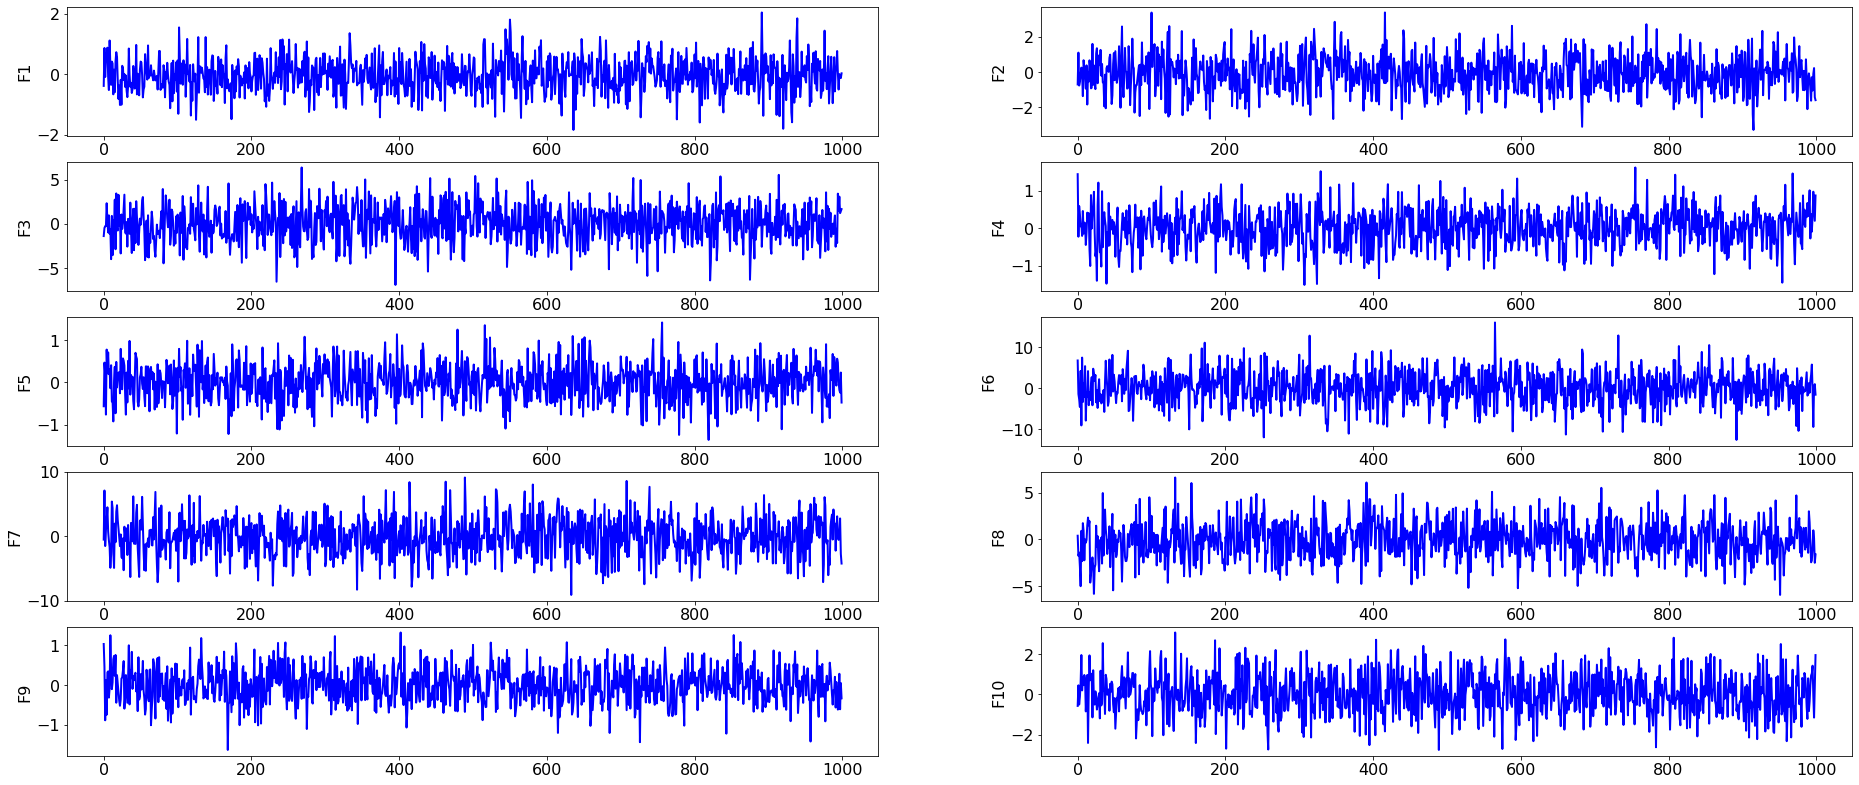

In [6]:
# Plot the data
dataset = pd.DataFrame(X.T, columns=['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10'])
plt.figure(figsize=(32, 48))
plt.rcParams.update({'font.size': 16})
cols = dataset.columns
for i in range(dataset.shape[1]):
    plt.subplot(17, 2, i+1)
    plt.ylabel(cols[i])
    plt.plot(dataset[cols[i]], lw=2, color='b')
plt.show()

In [7]:
# Inverse square root of the correlation matrix
from scipy.linalg import eigh

# Compute Correlation matrix and eigen vectors of the generated data
corX = (X @ X.T) / nSamples

# Eigenvalues and eigenvectors of corX
eigvals, eigvecs = eigh(corX)
print("eigvals =\n", eigvals[::-1])

V = np.fliplr(eigvecs)
D  = np.diag(np.sqrt(1/eigvals[::-1]))
Ah = V @ D @ V.T
Ah.shape


eigvals =
 [17.10539689  8.86613612  4.82871571  3.11385739  1.22828572  0.87185317
  0.25068724  0.2134704   0.19338247  0.13407199]


(10, 10)

In [8]:
# Adaptive algorithm
from numpy import linalg as la

A = np.zeros(shape=(nDim,nDim)) # stores adaptive correlation matrix
W1 = np.identity(nDim) # weight matrix Alg 1
W2 = np.identity(nDim) # weight matrix Alg 2
W3 = np.identity(nDim) # weight matrix Alg 3

I  = np.identity(nDim) # identity matrix

err1 = np.zeros(shape=(nSamples*nEpochs))
err2 = np.zeros(shape=(nSamples*nEpochs))
err3 = np.zeros(shape=(nSamples*nEpochs))
err4 = np.zeros(shape=(nSamples*nEpochs))

for epoch in range(nEpochs):
    for iter in range(nSamples):
        cnt = nSamples*epoch + iter
      
        x = X[:,iter]
        x = x.reshape(nDim,1)
        A = A + (1.0/(1 + cnt))*((np.dot(x, x.T)) - A)
        etat1 = 1.0/(100 + cnt)
        etat2 = 1.0/(100 + cnt)
      
        # Algorithm 1
        W1 = W1 + etat1 * (W1 - W1 @ W1.T @ A @ W1)
      
        # Algorithm 2
        W2 = W2 + etat1 * (W2 - W2 @ A @ W2.T @ W2)
      
        # Algorithm 3
        W3 = W3 + etat2 * (I - W3 @ A @ W3)
      
        err1[cnt] = la.norm(I - W1.T @ A @ W1, 'fro')
        err2[cnt] = la.norm(I - W2 @ A @ W2.T, 'fro')
        err3[cnt] = la.norm(I - W3 @ A @ W3, 'fro')
        err4[cnt] = la.norm(Ah - W3, 'fro')


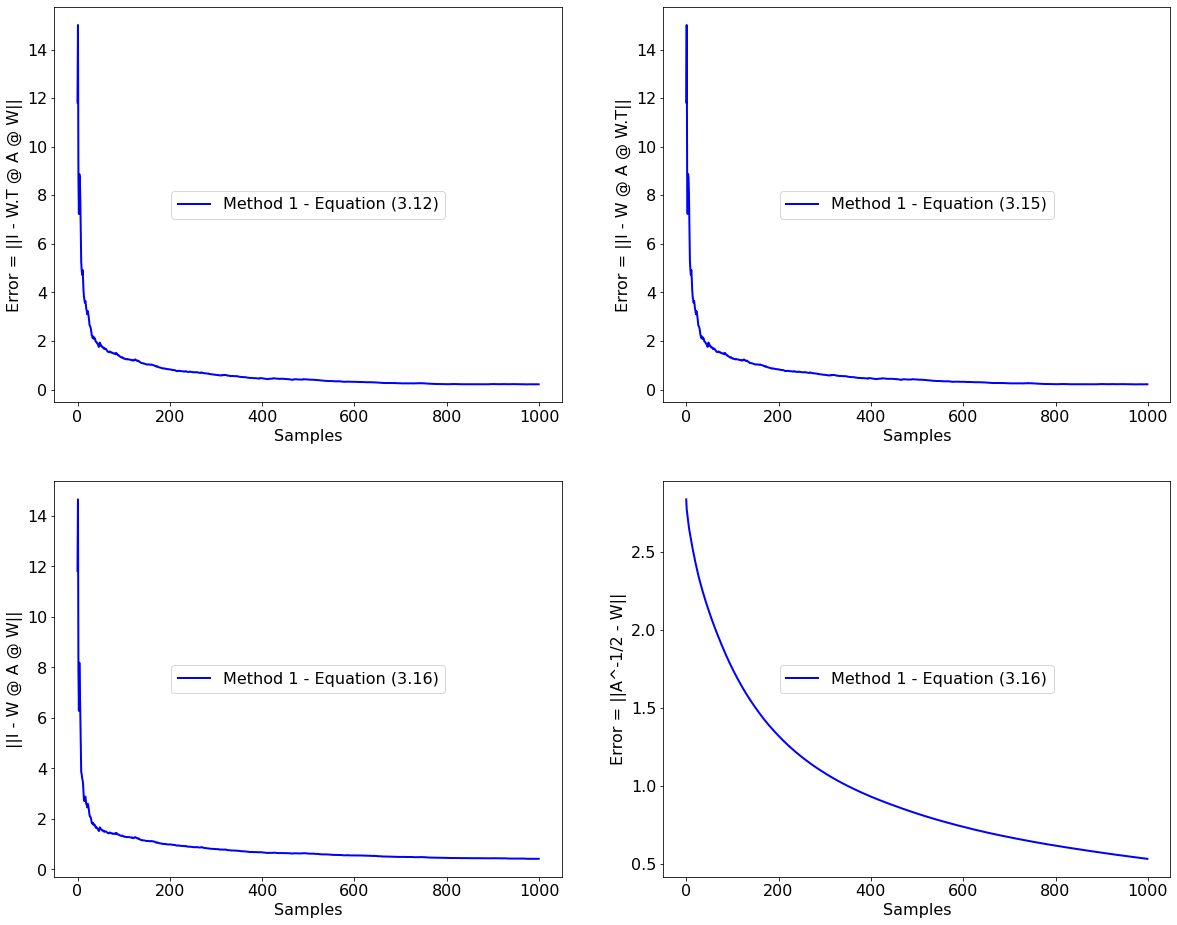

In [10]:
plt.figure(figsize=(20, 16))
plt.rcParams.update({'font.size': 16})

plt.subplot(2, 2, 1)
plt.plot(err1, lw=2, color='b', label="Method 1 - Equation (3.12)")
plt.ylabel('Error = ||I - W.T @ A @ W||')
plt.xlabel('Samples')
plt.legend(loc="center")

plt.subplot(2, 2, 2)
plt.plot(err2, lw=2, color='b', label="Method 1 - Equation (3.15)")
plt.ylabel('Error = ||I - W @ A @ W.T||')
plt.xlabel('Samples')
plt.legend(loc="center")

plt.subplot(2, 2, 3)
plt.plot(err3, lw=2, color='b', label="Method 1 - Equation (3.16)")
plt.ylabel('||I - W @ A @ W||')
plt.xlabel('Samples')
plt.legend(loc="center")

plt.subplot(2, 2, 4)
plt.plot(err4, lw=2, color='b', label="Method 1 - Equation (3.16)")
plt.ylabel('Error = ||A^-1/2 - W||')
plt.xlabel('Samples')
plt.legend(loc="center")

plt.show()

In [12]:
print(err1[500])
print(err2[500])
print(err3[500])
print(err4[500])

0.41922745963788666
0.41922745963788677
0.6304954477497313
0.8229677892734172


In [10]:
# Whitened Correlation matrix
Y = W3 @ X
corY = (Y @ Y.T) / nSamples
print(corY)

[[ 8.97911174e-01  5.91123588e-03 -2.42984333e-02 -2.41935604e-02
   3.13829245e-02 -1.23674928e-02  1.12022219e-02  7.08206150e-03
   1.97377489e-02  5.76025459e-02]
 [ 5.91123588e-03  9.74145761e-01 -4.46164706e-03 -2.26390891e-02
  -4.35883221e-02  6.86216427e-04  1.01299370e-02  2.69857491e-02
  -1.03362757e-02  9.07611816e-03]
 [-2.42984333e-02 -4.46164706e-03  9.83991248e-01  1.50553843e-02
   1.67986328e-02  1.15235969e-02  6.17472859e-03  1.28691961e-02
  -8.87826747e-03 -2.44721066e-02]
 [-2.41935604e-02 -2.26390891e-02  1.50553843e-02  8.23223968e-01
  -3.11137066e-02 -1.05732172e-02 -3.34453965e-03 -1.76184491e-02
  -2.06801820e-02 -1.07226903e-02]
 [ 3.13829245e-02 -4.35883221e-02  1.67986328e-02 -3.11137066e-02
   7.76174895e-01  5.35779521e-03  1.22737280e-02 -2.17010857e-02
  -3.76571257e-02 -3.37207953e-02]
 [-1.23674928e-02  6.86216427e-04  1.15235969e-02 -1.05732172e-02
   5.35779521e-03  9.83546585e-01 -1.11918606e-03 -7.30807720e-04
   7.07541428e-03 -1.30939299e-02